<a href="https://colab.research.google.com/github/ira89l/Home-tasks-/blob/main/Final_project_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: "Exploring the London Real Estate Market"

***Dataset Description***: London Property Listings Dataset

*This dataset is an extension of the original London Property Listings, including additional attributes for in-depth analysis of property purchase prices in London. It is perfect for research and projects related to real estate market trends, price categorization, and area-based analysis in one of the most active markets in the world.*

***Dataset Features:***

*Price:* Property purchase price in GBP.

*Property Type:* Classification of the property (e.g., Apartment, Flat).

*Bedrooms:* Number of bedrooms in the property.

*Bathrooms:* Number of bathrooms.

*Size:* Property size in square feet (if available).

*Postcode:* Postal code of the property's location.

*Area:* General information about the area or neighborhood.

*Price_Category:* Price categorization into predefined ranges (e.g., Low, Medium, High).

*Area_Avg_Price:* Average property price in the same area.

***Data Summary:***

*Total records:* 29,537

*Total attributes:* 9

---

*This dataset was prepared and uploaded by Mehmet Emre Sezer. It is intended for educational and non-commercial purposes.*

[Link to the dataset](https://www.kaggle.com/datasets/sezermehmetemre/london-property-listings-dataset/data)


***My Main Goal*** - Exploring the London Real Estate Market.

Questions:
1. How are prices distributed across different areas?
2. Which area has the most property listings?
3. Do one-bedroom apartments dominate in certain areas of the city?
4. Which area has the highest number of properties with the largest size?
5. How does property size correlate with price categories (Low, Medium, High)?
6. In which areas do affordable properties (Low Price category) dominate?
7. What percentage of the market consists of one-bedroom properties compared to multi-bedroom options?
8. Which area has the highest average rental price?
9. Does proximity to central areas affect rental price? How does the average rental price vary between central and non-central areas?
10. Which area has the largest average property size?

[Download the Power BI Project File](https://drive.google.com/file/d/1Naq_Tbn_Mn3IZYddUk2hrFkRmWgsJlSc/view?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
import kagglehub

path = kagglehub.dataset_download("sezermehmetemre/london-property-listings-dataset")

print("Path to dataset files:", path)

100%|██████████| 187k/187k [00:00<00:00, 61.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sezermehmetemre/london-property-listings-dataset/versions/2


In [3]:
data_path = "/root/.cache/kagglehub/datasets/sezermehmetemre/london-property-listings-dataset/versions/2"
file_name = "London Property Listings Dataset.csv"

In [4]:
conn = sqlite3.connect('real_estate_data.db')

In [5]:
dataset = pd.read_csv(f"{data_path}/{file_name}")
print("Dataset successfully loaded")

dataset.to_sql('properties', conn, if_exists='replace', index=False)
print("Table 'properties' successfully created and populated with data.")

query = "SELECT * FROM properties"
data = pd.read_sql_query(query, conn)

print("First 5 rows of the data:")
print(data.head())

Dataset successfully loaded
Table 'properties' successfully created and populated with data.
First 5 rows of the data:
      Price Property Type  Bedrooms  Bathrooms        Size Postcode  \
0  330000.0     Apartment       1.0        1.0  518.000000      E14   
1  340000.0          Flat       1.0        1.0  887.498269      E14   
2  340000.0     Apartment       1.0        1.0  934.569040      E14   
3  340000.0          Flat       1.0        1.0  887.498269      E14   
4  340000.0          Flat       1.0        1.0  388.000000     SW20   

            Area Price_Category  Area_Avg_Price  
0        Eastern            Low    1.001684e+06  
1        Eastern            Low    1.001684e+06  
2        Eastern            Low    1.001684e+06  
3        Eastern            Low    1.001684e+06  
4  South Western            Low    1.516724e+06  


In [6]:
# Checking for missing values and column type mismatches
print("\nDataset information:")
print(data.info())

print("\nChecking for missing values:")
print(data.isnull().sum())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29537 entries, 0 to 29536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           29537 non-null  float64
 1   Property Type   29537 non-null  object 
 2   Bedrooms        29537 non-null  float64
 3   Bathrooms       29537 non-null  float64
 4   Size            29537 non-null  float64
 5   Postcode        29537 non-null  object 
 6   Area            29537 non-null  object 
 7   Price_Category  29537 non-null  object 
 8   Area_Avg_Price  29537 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.0+ MB
None

Checking for missing values:
Price             0
Property Type     0
Bedrooms          0
Bathrooms         0
Size              0
Postcode          0
Area              0
Price_Category    0
Area_Avg_Price    0
dtype: int64


In [7]:
# Cleaning the data from duplicates and anomalies
print(data.describe())

              Price      Bedrooms     Bathrooms          Size  Area_Avg_Price
count  2.953700e+04  29537.000000  29537.000000  2.953700e+04    2.953700e+04
mean   9.652355e+05      2.262620      1.621322  1.201678e+03    1.151853e+06
std    8.500518e+05      1.121841      1.120325  8.814953e+03    3.156087e+05
min    6.500000e+04      1.000000      1.000000  2.600000e+01    4.187500e+05
25%    5.000000e+05      1.000000      1.000000  8.200000e+02    1.001684e+06
50%    6.900000e+05      2.000000      1.000000  8.960000e+02    1.001684e+06
75%    1.075000e+06      3.000000      2.000000  1.184000e+03    1.516724e+06
max    5.950000e+06     14.000000    144.000000  1.500000e+06    1.706839e+06


**I see an anomaly:**
1. 144 bathrooms in a residence. Most likely, this is a data entry error. Thanks to the visualization in Power BI, it can be seen that this value corresponds to a one-bedroom apartment in the 'medium' price category. This further confirms that it is a data entry mistake.
2. Additionally, there seems to be a potential anomaly in the size of one property, as the size of the residence is around 140,000 square meters. I also notice another anomaly in the minimum property size, as it refers to a one-bedroom apartment but cannot be just 2 square meters.

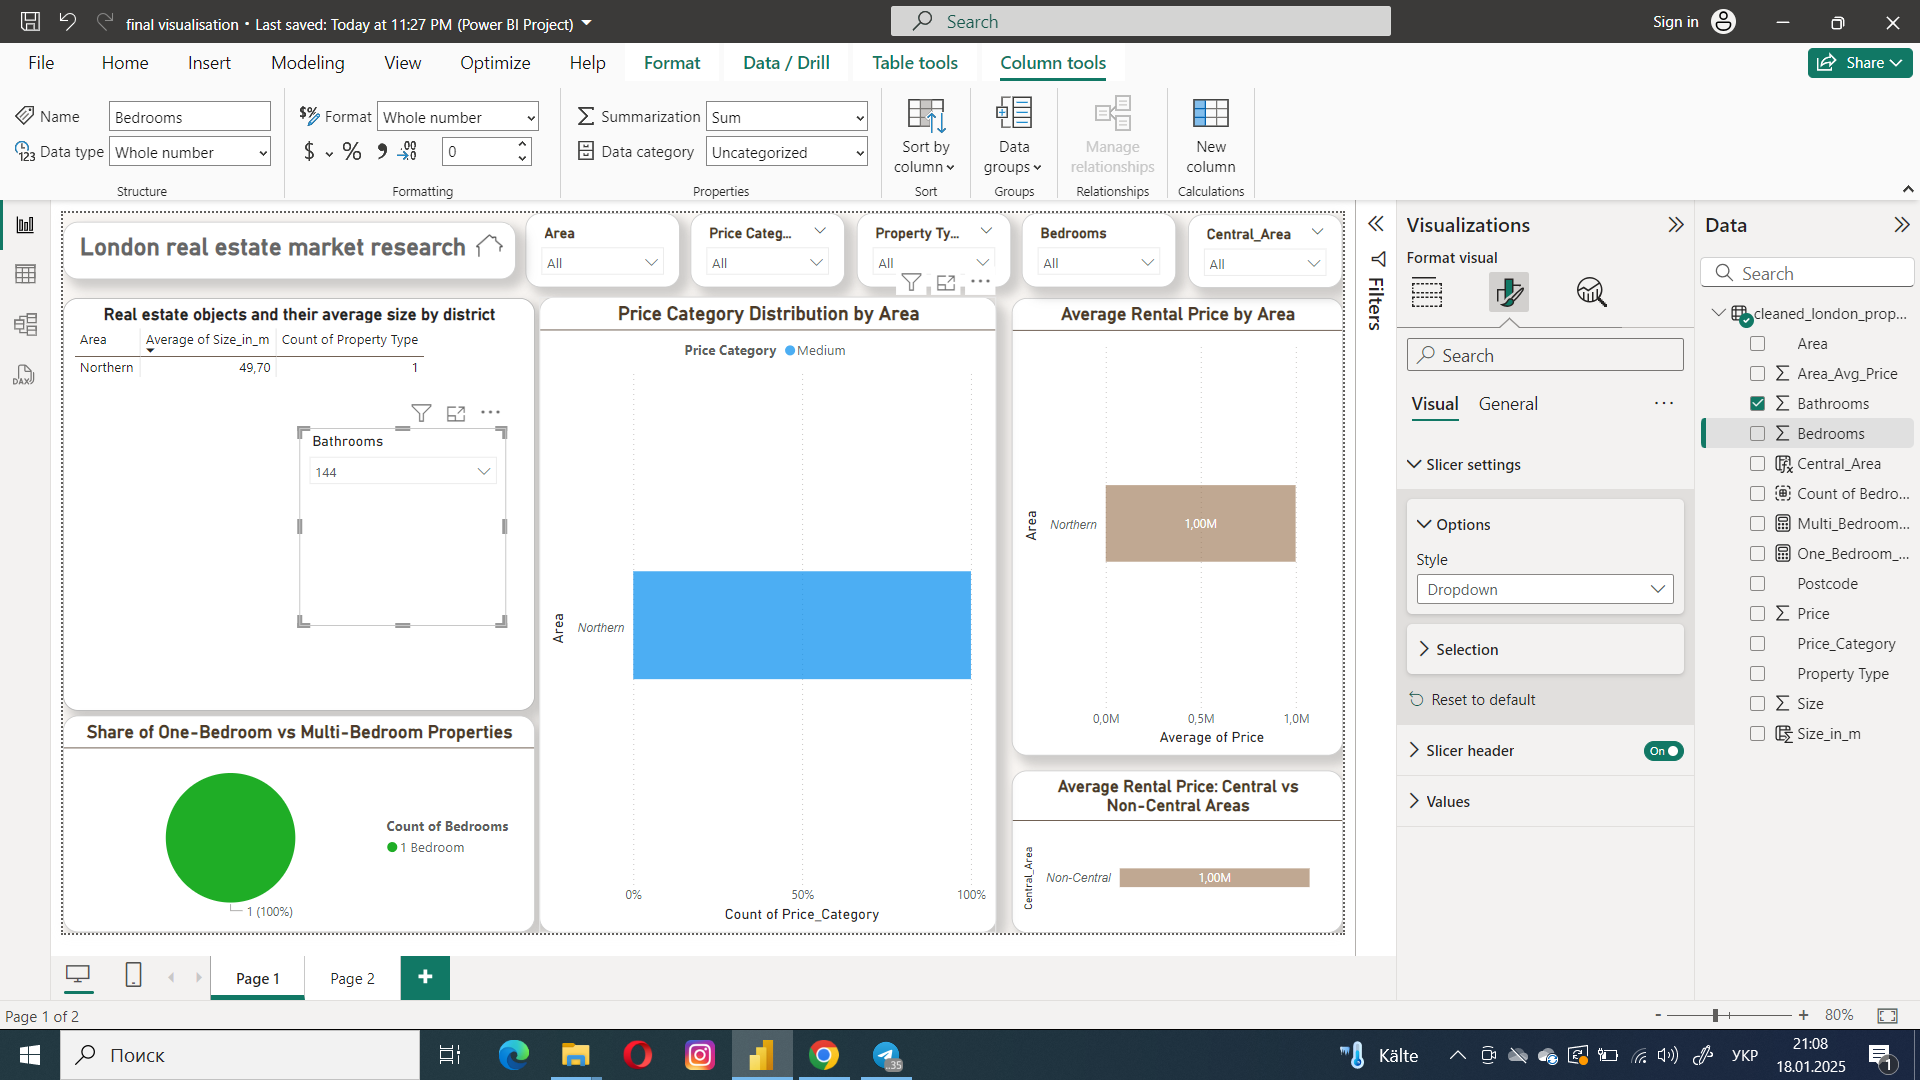

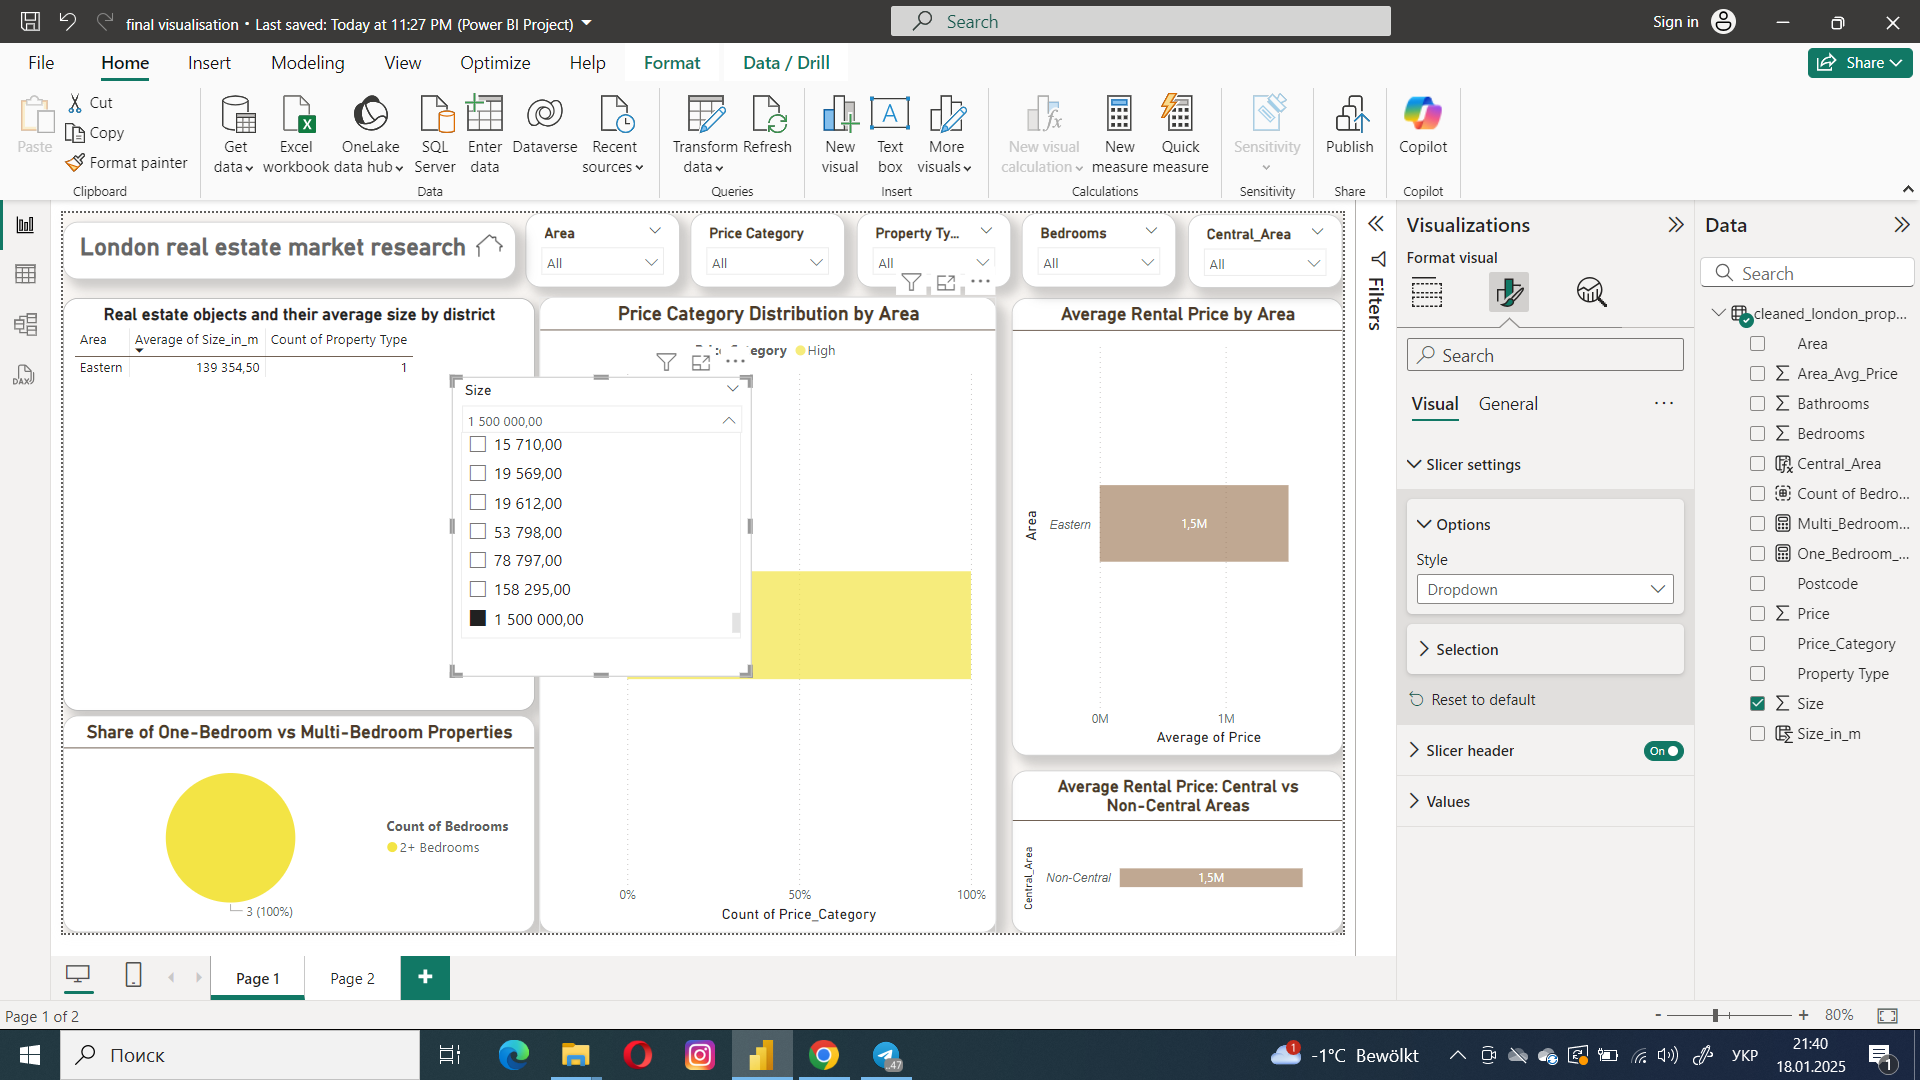

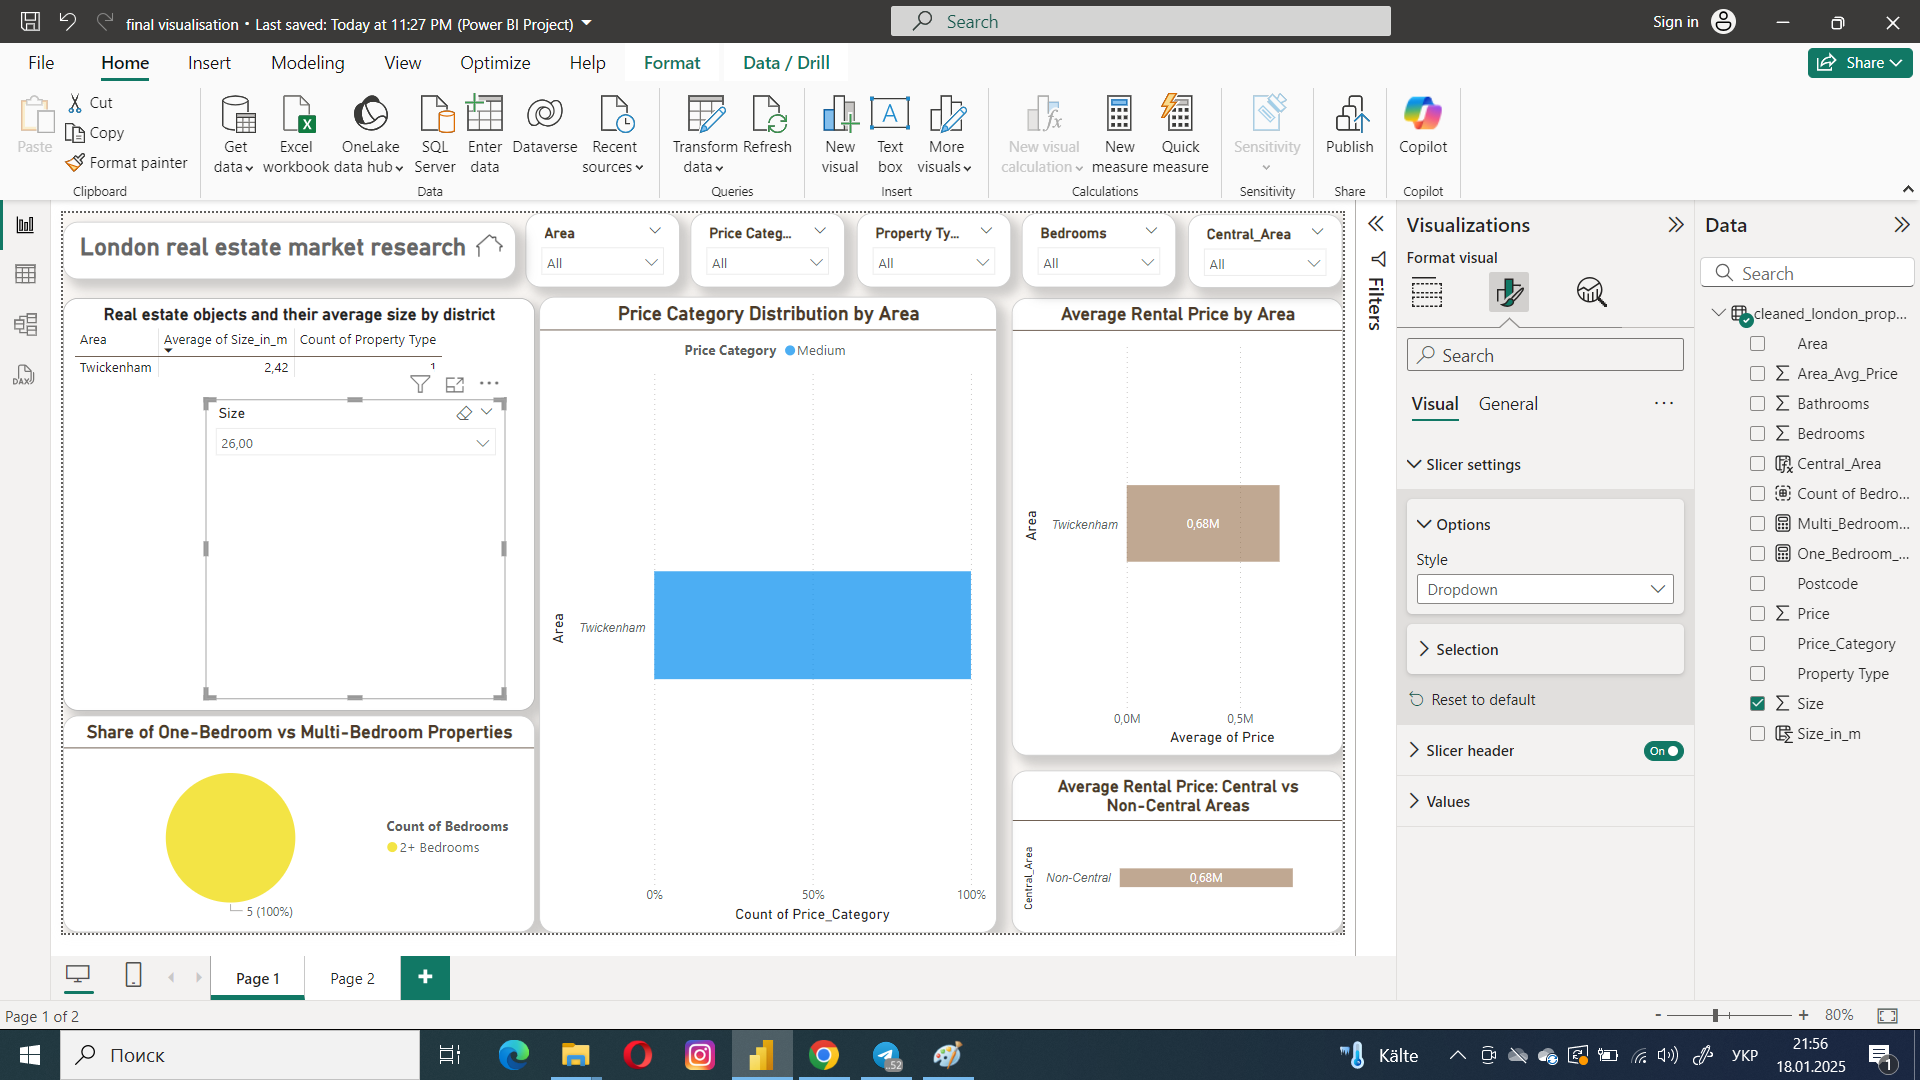

In [8]:
# Cleaning the data from anomalous values in the number of bathrooms and unusually large sizes
data = data[(data['Bathrooms'] < 13) & (data['Size'] < 160000)]

In [9]:
# Applying logic to filter out anomalously small property sizes
data = data[data['Size'] >= data['Bedrooms'] * 30]

In [10]:
# Saving the filtered file for additional visualization in Power BI
filtered_file_path = "filtered_real_estate_data.csv"
data.to_csv(filtered_file_path, index=False, encoding='utf-8-sig')
print(f"Filtered data has been saved to file: {filtered_file_path}")

Filtered data has been saved to file: filtered_real_estate_data.csv


Average prices by area:
Area
Bromley                   4.187500e+05
Croydon                   4.352941e+05
Enfield                   5.015973e+05
Harrow                    5.106283e+05
Kingston                  5.700000e+05
Ilford                    5.856667e+05
Sutton                    6.616667e+05
South Eastern             6.657757e+05
Northern                  7.684698e+05
Kingston upon Thames      8.009967e+05
Eastern                   8.420745e+05
Twickenham                8.516071e+05
North Western             1.005454e+06
South Western             1.216610e+06
Eastern Central           1.235202e+06
Western and Paddington    1.378724e+06
Western Central           1.423378e+06
Name: Price, dtype: float64


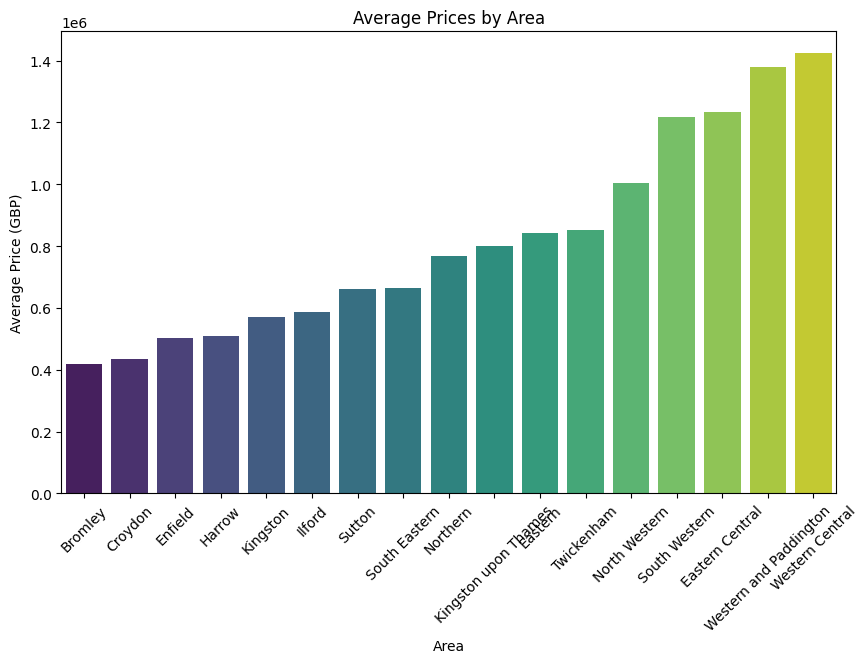

In [11]:
# After filtering, we can start analyzing the data
# 1. How are prices distributed across different areas?
price_by_area = data.groupby('Area')['Price'].mean().sort_values()
print("Average prices by area:")
print(price_by_area)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_area.index, y=price_by_area.values, palette='viridis', hue=price_by_area.index)
plt.title('Average Prices by Area')
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Average Price (GBP)')
plt.show()

**We see that the average price is highest in the following city areas: Western Central, Western and Paddington, Eastern Central. Additionally, from the Power BI visualization, we observe that in the areas of Sutton and Kingston, there is property only in one price category - medium. In the areas of Enfield, Harrow, Croydon, Kingston upon Thames, Bromley, and Ilford, there is no property in the luxury category, as is the case in Sutton and Kingston. The areas of Harrow, Croydon, Bromley, and Ilford have properties in two price categories - low and medium.
*Thus, we can conclude that central areas have the highest average property prices.***

Number of properties by area:
Area
Eastern                   13067
South Western              4993
Western and Paddington     3264
South Eastern              2810
North Western              2376
Northern                   1685
Twickenham                  506
Eastern Central             432
Western Central             223
Enfield                     101
Harrow                       23
Croydon                      17
Kingston upon Thames         15
Bromley                       4
Ilford                        3
Sutton                        3
Kingston                      1
Name: count, dtype: int64


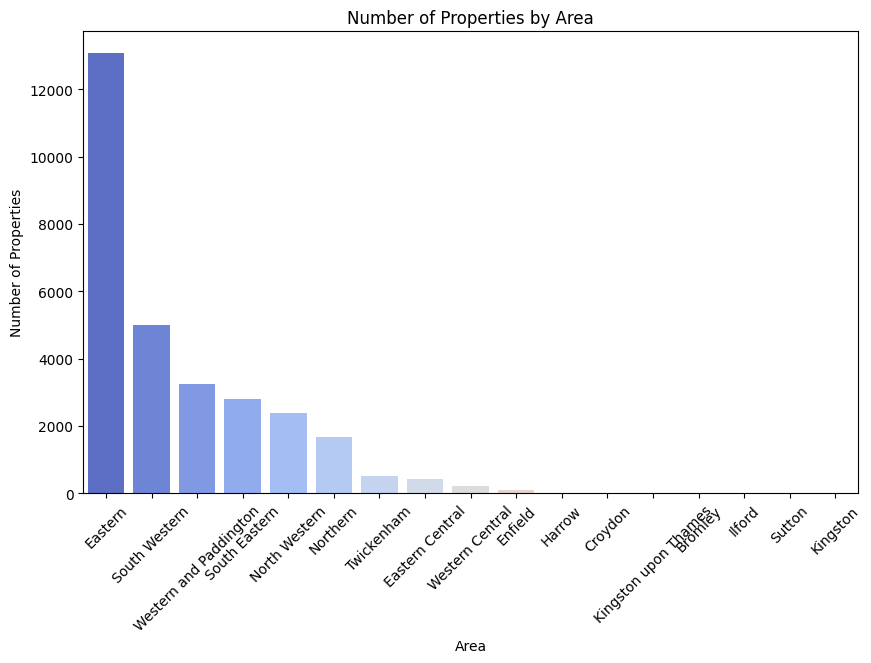

In [12]:
# 2. Which area has the most properties?
property_count = data['Area'].value_counts()
print("Number of properties by area:")
print(property_count)

plt.figure(figsize=(10, 6))
sns.barplot(x=property_count.index, y=property_count.values, palette='coolwarm', hue=property_count.index)
plt.title('Number of Properties by Area')
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Number of Properties')
plt.show()

**We see that the area with the highest number of properties is the Eastern district, with over 13,000 housing units. This may be due to the lower housing prices there (an average price of 0.8 million) compared to central districts (average price ranging from 1.4 to 1.2 million). It is possible that the area has good transport connections, which could attract potential buyers, but the quality of the transport network should be further investigated.**

Distribution of one-bedroom apartments by area:
Area
Eastern                   3297
South Western             1211
Western and Paddington     855
South Eastern              826
North Western              451
Northern                   411
Eastern Central            158
Twickenham                 102
Western Central             74
Enfield                     21
Harrow                       4
Croydon                      3
Kingston upon Thames         1
Bromley                      1
Name: count, dtype: int64

Percentage of one-bedroom apartments by area:
Area
Bromley                   25.000000
Croydon                   17.647059
Eastern                   25.231499
Eastern Central           36.574074
Enfield                   20.792079
Harrow                    17.391304
Ilford                          NaN
Kingston                        NaN
Kingston upon Thames       6.666667
North Western             18.981481
Northern                  24.391691
South Eastern             29.395018
Sou

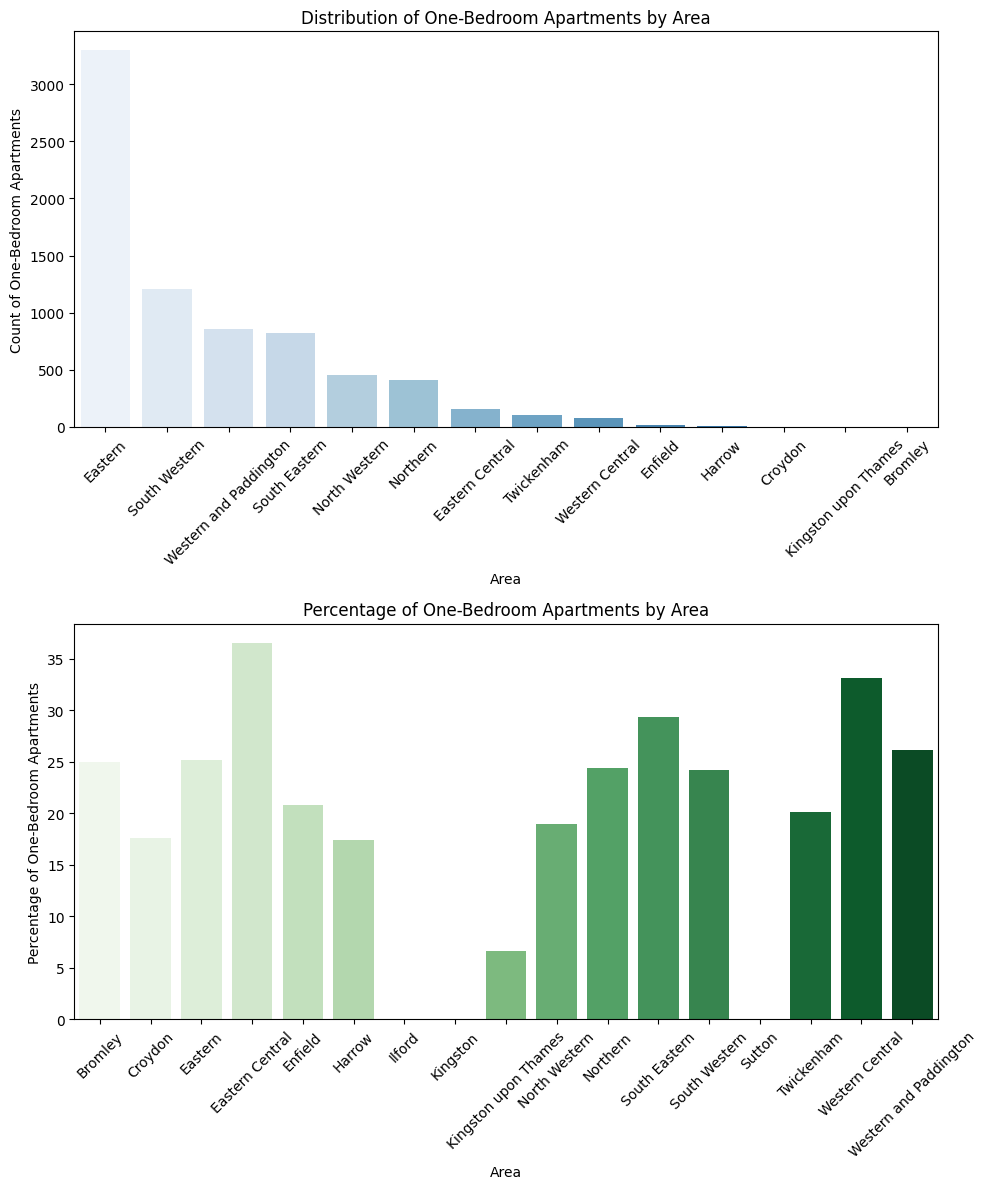

In [13]:
# 3. Do one-bedroom apartments dominate in certain areas of the city?
bedroom_distribution = data[data['Bedrooms'] == 1]['Area'].value_counts()
total_distribution = data['Area'].value_counts()

percentage_bedroom_distribution = (bedroom_distribution / total_distribution) * 100

print("Distribution of one-bedroom apartments by area:")
print(bedroom_distribution)
print("\nPercentage of one-bedroom apartments by area:")
print(percentage_bedroom_distribution)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# First visualization: count of one-bedroom apartments
sns.barplot(x=bedroom_distribution.index, y=bedroom_distribution.values, palette='Blues', hue=bedroom_distribution.index, ax=ax[0])
ax[0].set_title('Distribution of One-Bedroom Apartments by Area')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Count of One-Bedroom Apartments')
ax[0].tick_params(axis='x', rotation=45)

# Second visualization: percentage of one-bedroom apartments by area
sns.barplot(x=percentage_bedroom_distribution.index, y=percentage_bedroom_distribution.values, palette='Greens', hue=percentage_bedroom_distribution.index, ax=ax[1])
ax[1].set_title('Percentage of One-Bedroom Apartments by Area')
ax[1].set_xlabel('Area')
ax[1].set_ylabel('Percentage of One-Bedroom Apartments')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**We see that in the districts of Eastern Central, Western Central, and South Eastern, one-bedroom apartments account for more than 25% of the real estate market. This indicates a high demand for compact housing in these areas, likely due to convenient locations and affordability.**

*Eastern Central (36.57%)* — This district has the highest percentage of one-bedroom apartments. This may indicate that the area is very popular among young people, single individuals, or students seeking compact and affordable housing.

*Western Central (33.18%)* — Another district with a high percentage of one-bedroom apartments. Similar to other areas with a strong demand for small-scale housing, this district may attract buyers due to its convenient location and well-developed infrastructure.

*South Eastern (29.40%)* — The next district with a significant percentage of one-bedroom apartments. This result also suggests high demand for compact housing, confirming the preference for more affordable real estate options.

*Kingston upon Thames (6.67%)* — This district has one of the lowest percentages of one-bedroom apartments, which could indicate higher real estate prices or that larger apartments, suitable for families, dominate this area.

We also observe that in the districts of *Ilford, Kingston, Sutton* — data is absent for these areas, which means there are no one-bedroom apartments. This could be related to transportation accessibility, the district's distance from the urbanized part of the city, or the real estate prices.

In [14]:
# 4. Which area has the largest property size?
max_size_area = data.loc[data['Size'].idxmax()]
print("Area with the largest property size:")
print(max_size_area)

Area with the largest property size:
Price                  640000.0
Property Type     Semi-Detached
Bedrooms                    5.0
Bathrooms                   2.0
Size                   158295.0
Postcode                    EN1
Area                    Enfield
Price_Category           Medium
Area_Avg_Price    501597.287129
Name: 24857, dtype: object


**This result shows that real estate in Enfield is an attractive option for large families or those seeking more space and willing to invest in high-quality housing with comfortable living conditions.** The price of this house is £640,000, which, although higher than the average (£501,597) for the area, reflects the large size of the house (14,706 sq. ft.).

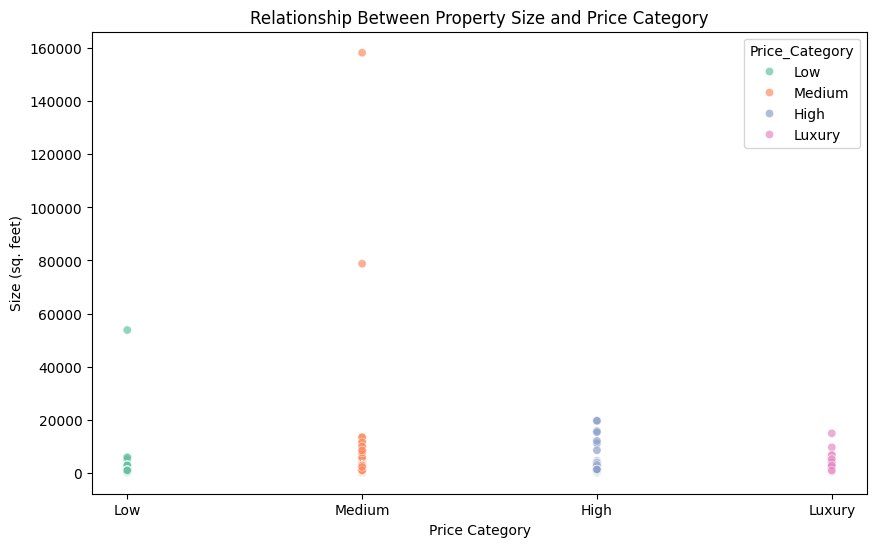

                       mean       median  count
Price_Category                                 
High            1406.512568  1148.000000   4246
Low              836.999675   887.498269   7608
Luxury          1842.286495  1691.000000   2597
Medium          1119.190923   887.498269  15072


In [15]:
# 5. How does property size relate to price category (Low, Medium, High)?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price_Category', y='Size', hue='Price_Category', palette='Set2', alpha=0.7)
plt.title('Relationship Between Property Size and Price Category')
plt.xlabel('Price Category')
plt.ylabel('Size (sq. feet)')
plt.show()

pivot = data.groupby('Price_Category')['Size'].agg(['mean', 'median', 'count'])
print(pivot)

**The size of the property increases with the price category, which aligns with market logic: higher prices provide access to larger spaces.**

*Low and Medium* categories have the largest number of properties (Low - 7,608, Medium - 15,072), indicating that these are the main market segments for a wide range of buyers. The *Low* category has the smallest average size among all groups, which logically corresponds to the lower price. In the *Medium* category, the median size is significantly smaller than the average, indicating the presence of some very large properties that skew the average value.

*High and Luxury* categories have larger sizes, but a much smaller number of properties (Luxury - 2,597, High - 4,246), suggesting their exclusivity and a high level of limited demand.

Areas with the highest number of 'Low Price' properties:
Area
Eastern                   3967
South Eastern             1198
South Western              751
North Western              577
Northern                   520
Western and Paddington     331
Twickenham                 147
Enfield                     57
Eastern Central             17
Western Central             15
Croydon                     12
Harrow                      10
Kingston upon Thames         3
Bromley                      2
Ilford                       1
Name: count, dtype: int64


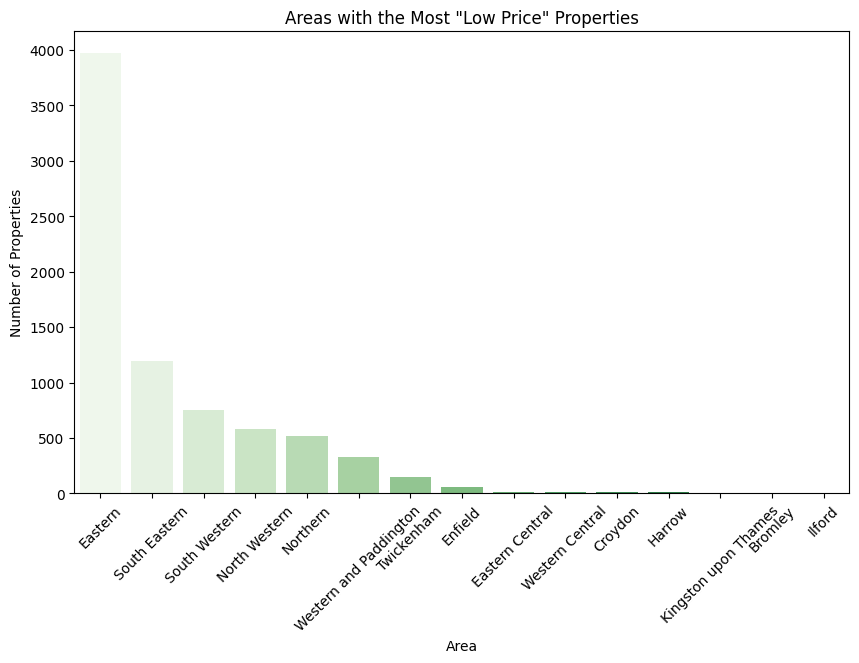

In [16]:
# 6. Which areas have the most affordable properties (category "Low Price")?
low_price_areas = data[data['Price_Category'] == 'Low']['Area'].value_counts()
print("Areas with the highest number of 'Low Price' properties:")
print(low_price_areas)

plt.figure(figsize=(10, 6))
sns.barplot(x=low_price_areas.index, y=low_price_areas.values, palette='Greens', hue=low_price_areas.index)
plt.title('Areas with the Most "Low Price" Properties')
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Number of Properties')
plt.show()

**Eastern is a key area for buyers seeking affordable housing. It has a large share of affordable properties (3,967).**
*South Eastern* (1,198), while significantly smaller than Eastern in terms of the number of properties, is also an important area for this price segment.
Areas with a low level of affordable housing, such as *Kingston upon Thames, Bromley, and Ilford*, may be targeting buyers with higher incomes.

Percentage distribution of bedroom counts:
Bedrooms
2.0     42.377130
1.0     25.116011
3.0     20.126681
4.0      7.746503
5.0      3.356705
6.0      0.924703
7.0      0.226942
8.0      0.081293
9.0      0.023710
10.0     0.010162
14.0     0.003387
12.0     0.003387
11.0     0.003387
Name: proportion, dtype: float64


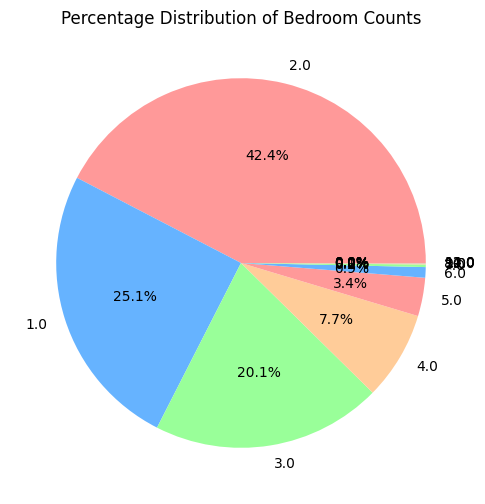

In [17]:
# 7. What percentage of the market consists of one-bedroom properties compared to multi-bedroom properties?
bedroom_percentage = data['Bedrooms'].value_counts(normalize=True) * 100
print("Percentage distribution of bedroom counts:")
print(bedroom_percentage)

plt.figure(figsize=(8, 6))
bedroom_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Percentage Distribution of Bedroom Counts')
plt.ylabel('')
plt.show()

We see that ***two-bedroom apartments (42.38%)*** make up the largest share of the real estate market. This suggests that this type of housing is the most popular among buyers or the most common among developers.

Meanwhile, ***one-bedroom apartments (25.12%)*** rank second in popularity, confirming their significant demand, especially from students or those seeking affordable housing.

**From this visualization, we can see that one-bedroom, two-bedroom, and three-bedroom apartments together account for nearly 87.6% of the market, confirming their key role in the mass consumption segment. The real estate market is largely focused on compact housing (1-3 bedrooms), which is the most affordable and popular. At the same time, the premium segment with more bedrooms remains niche and has limited demand.**

In [18]:
# 8. Which area has the highest average rental price?
highest_avg_price_area = data.groupby('Area')['Price'].mean().idxmax()
highest_avg_price = data.groupby('Area')['Price'].mean().max()
print(f"Area with the highest average rental price: {highest_avg_price_area} (Average price: {highest_avg_price:.2f} GBP)")

Area with the highest average rental price: Western Central (Average price: 1423378.45 GBP)


**Western Central is the most expensive area for real estate rental with an impressive average price of 1,423,378.45 GBP.**

Comparison of average prices between central and non-central areas:
Is_Central
Central        1.365444e+06
Non-Central    9.042065e+05
Name: Price, dtype: float64


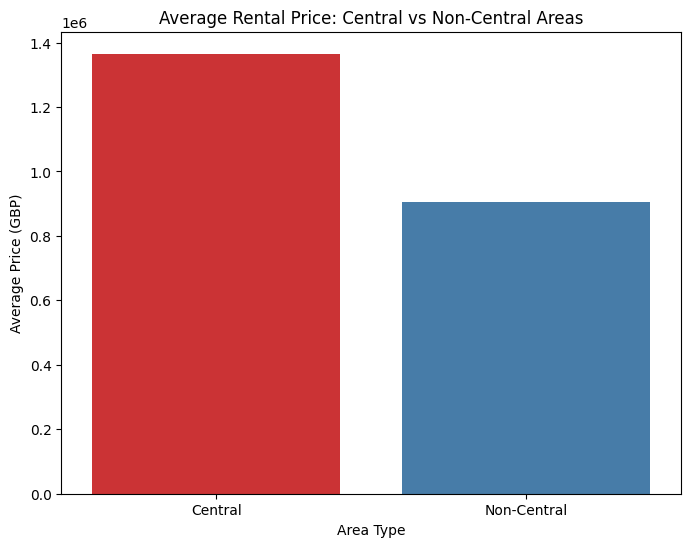

In [19]:
# 9. Does proximity to central areas affect rental price? How does the average rental price differ between central and non-central areas?
central_areas = ['Eastern Central', 'Western Central', 'Western and Paddington']
data['Is_Central'] = data['Area'].apply(lambda x: 'Central' if x in central_areas else 'Non-Central')

central_price_comparison = data.groupby('Is_Central')['Price'].mean()

print("Comparison of average prices between central and non-central areas:")
print(central_price_comparison)

plt.figure(figsize=(8, 6))
sns.barplot(x=central_price_comparison.index, y=central_price_comparison.values, palette='Set1', hue=central_price_comparison.index)
plt.title('Average Rental Price: Central vs Non-Central Areas')
plt.xlabel('Area Type')
plt.ylabel('Average Price (GBP)')
plt.show()

**We see a high difference between the average prices in central and non-central areas, which confirms that proximity to central districts is a key factor in determining rental prices.** This may be due to developers in central areas being more focused on the premium segment, while non-central areas provide more affordable housing for a wider audience.

In [20]:
# 10. Which area has the largest average property size?
highest_avg_size_area = data.groupby('Area')['Size'].mean().idxmax()
highest_avg_size = data.groupby('Area')['Size'].mean().max()
print(f"Area with the largest average property size: {highest_avg_size_area} (Average size: {highest_avg_size:.2f} sq. ft.)")

Area with the largest average property size: Enfield (Average size: 3073.52 sq. ft.)


**Enfield offers the largest average property size (3,073.52 sq. ft.), which may be related to the specifics of development, land availability, and a focus on spacious residential buildings.** This result fully aligns with our previous housing market research in this area, as properties in Enfield have large living spaces, which we examined in question 4. We can also observe this in the Power BI visualization.

[Download Power BI Project file](https://drive.google.com/file/d/1Naq_Tbn_Mn3IZYddUk2hrFkRmWgsJlSc/view?usp=sharing)


**General Analysis of the Real Estate Market**

*Market Distribution by Property Types:*
*   Two-bedroom apartments (42.38%) are the most popular, followed by one-bedroo (25.12%), indicating a strong demand for compact housing. Together with three-bedroom apartments, these types make up almost 87.6% of the market, showing that smaller properties dominate.


*Property Prices and Demand:*
*  Western Central is the most expensive area with an average price of £1,423,378.45, indicating a focus on the premium segment. Central areas generally have higher prices, confirming the importance of proximity to the city center.
Enfield offers the largest average property size (3,073.52 sq. ft.), reflecting the availability of land and a focus on spacious homes.


*Affordable Housing Segments:*
*  Eastern is a key district for affordable housing, with a large number of reasonably priced properties. South Eastern also has affordable options but with fewer units. In contrast, Kingston upon Thames, Bromley, and Ilford have limited affordable housing, catering to higher-income buyers.


*Property Size Trends:*
*  Larger properties are more common in the High and Luxury categories, though they make up a smaller portion of the market. The trend of larger properties correlating with higher prices is evident.


*Overall Market Focus:*
* The majority of the market focuses on affordable Low and Medium categories, which meet the needs of a wide range of buyers. Premium properties remain niche, targeting exclusive customer segments.